<a href="https://colab.research.google.com/github/SudhakarAnemu/AI-DS-ML-DL/blob/master/DL_TensroFlow_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("js")

js


# Importing all required Libraries

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [3]:
!pip install tensorflow
!pip install scikit-learn
!pip install tensorflow-datasets

In [0]:
import tensorflow as tf

In [5]:
print("Version of the Tenserflow : ", tf.__version__)

Version of the Tenserflow :  2.1.0-rc1


##Section 4

### Example 1

Import all relevant libraries

In [6]:
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # nice graphs
from mpl_toolkits.mplot3d import Axes3D # nice 3D graphs
print("Import done")

Import done


Generate random input data to train on.
<br>we are about to create a two variable linear model :<br>f(x,z) = a*x +b*z +c
<br>From the linear model: inputs = n * k = 1000*2
<br>

In [7]:
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
inputs = np.column_stack((xs, zs)) # define like a matrix
print("shape of the inputs(its like Matrix) : ", inputs.shape)

shape of the inputs(its like Matrix) :  (1000, 2)


Create the targets we will aim at
<br> targets = f(x,z) = 2*x - 3*z + 5 + noise
<br> here 2,3 are weights and 5 is the bias
<br> noise will always be there in the real data. 


In [8]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise
print("shape of the targets : ", targets.shape)
# print("Sample data : ", targets

shape of the targets :  (1000, 1)


In [9]:
print(targets.any)

<built-in method any of numpy.ndarray object at 0x7fab9cc70d50>


Plot the training data
<br>The point is to see that there is a strong trend that out model should learn to reproduce
<br>

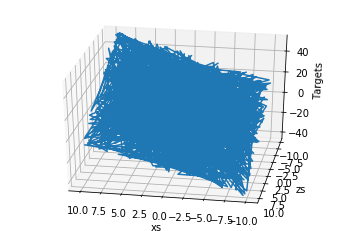

In [10]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

Initialize variables
<br>Our initial weights and biases will be picked randomly from the interval [-0.1,0.1]
<br>weights : matrix, biases : scaler
<br>

In [11]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, size=(2,1))
print("Weights : ", weights)
biases = np.random.uniform(-init_range, init_range, size=1)
print("Biases : ", biases)

Weights :  [[ 0.01730823]
 [-0.09391436]]
Biases :  [-0.03059956]


Set a learning rate(eta)
<br>

In [0]:
learning_rate = 0.02 #we can play with different learning rates

Train the model
<br>Procedure will be repeated.
<br>Game plan for each iteration
<br>1. calculate outputs
<br>2. compare outputs to targets through the loss
<br>3. print the loss
<br>4. Adjust weights and biases
<br>

In [13]:
for i in range(5000):
  outputs = np.dot(inputs, weights) + biases # y = mx + c - 1000*1 1000*2  2*1  scalar
  deltas = outputs - targets # deltas represents the diff between outputs and input targets
  loss = np.sum(deltas ** 2) / 2 / observations
  print("losss : ", loss)
  deltas_scaled = deltas / observations
  weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
  biases = biases - learning_rate * np.sum(deltas_scaled)

losss :  231.5562150467994
losss :  31.437894344971166
losss :  13.463253182554983
losss :  11.421072795121873
losss :  10.83258955357235
losss :  10.396266976081172
losss :  9.989882766229496
losss :  9.600891501864156
losss :  9.227438642751581
losss :  8.868783659555108
losss :  8.524326743388874
losss :  8.193504274060574
losss :  7.875776380756173
losss :  7.570624732916653
losss :  7.2775515371899635
losss :  6.996078706330859
losss :  6.725747076964301
losss :  6.466115660267898
losss :  6.216760922555865
losss :  5.9772760943689685
losss :  5.747270506915702
losss :  5.526368954778814
losss :  5.314211083847087
losss :  5.110450803473899
losss :  4.9147557219036315
losss :  4.726806604044868
losss :  4.546296850705961
losss :  4.372931998443344
losss :  4.206429239206786
losss :  4.046516958997924
losss :  3.8929342947895424
losss :  3.745430708982768
losss :  3.6037655807080275
losss :  3.4677078133030546
losss :  3.337035457327589
losss :  3.2115353484998885
losss :  3.091002

Print weight and biases and see if we have worked correctionly 
<br> Play around with the code for homework.
<br>1. number of observations
<br>2. leanring rate
<br>3. Number of iterations
<br>4. initial range for initializing weights and biases

In [14]:
print("weight : ", weights, " biases : ", biases)


weight :  [[ 1.99852911]
 [-3.00079834]]  biases :  [4.98080985]


Plot last output vs target

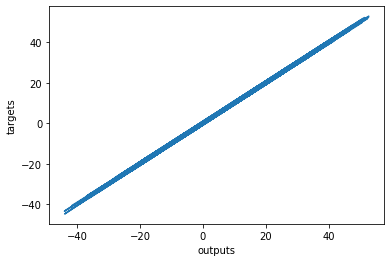

In [15]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

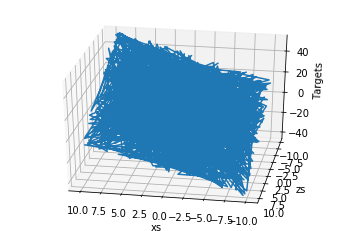

In [16]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

## Section 5

Same ex with TF
Minimal ex with TF
<br> Import the relevanth libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("Import done")

Import done


Data generation

In [0]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


Solving with TensorFlow

In [0]:
training_data = np.load('TF_intro.npz')

In [20]:
# input_size = 2
# output_size = 1

# model = tf.keras.Sequential([
#                              tf.keras.layers.Dense(output_size)
# ])

# model.compile(optimizer = 'sgd', loss='mean_squared_error')

# model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=0)

##### the only diff is that verbose=0 / 2

input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 1s - loss: 27.1769
Epoch 2/100
1000/1000 - 0s - loss: 4.2968
Epoch 3/100
1000/1000 - 0s - loss: 1.4241
Epoch 4/100
1000/1000 - 0s - loss: 0.6519
Epoch 5/100
1000/1000 - 0s - loss: 0.4160
Epoch 6/100
1000/1000 - 0s - loss: 0.3740
Epoch 7/100
1000/1000 - 0s - loss: 0.3469
Epoch 8/100
1000/1000 - 0s - loss: 0.3432
Epoch 9/100
1000/1000 - 0s - loss: 0.3440
Epoch 10/100
1000/1000 - 0s - loss: 0.3439
Epoch 11/100
1000/1000 - 0s - loss: 0.3430
Epoch 12/100
1000/1000 - 0s - loss: 0.3429
Epoch 13/100
1000/1000 - 0s - loss: 0.3440
Epoch 14/100
1000/1000 - 0s - loss: 0.3428
Epoch 15/100
1000/1000 - 0s - loss: 0.3336
Epoch 16/100
1000/1000 - 0s - loss: 0.3461
Epoch 17/100
1000/1000 - 0s - loss: 0.3349
Epoch 18/100
1000/1000 - 0s - loss: 0.3441
Epoch 19/100
1000/1000 - 0s - loss: 0.3400
Epoch 20/100
1000/1000 - 0s - loss: 0.3380
Epoch 21/100
1000/1000 - 0s - loss: 0.3454
Epoch 22/100
1000/1000 - 0s - loss: 0.3365
Epoch 23/100
1000/1000 - 0s - loss: 0.34

In [21]:
model.layers[0].get_weights()

[array([[ 2.0007746],
        [-2.9970698]], dtype=float32), array([4.9894047], dtype=float32)]

In [22]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0007746],
       [-2.9970698]], dtype=float32)

In [23]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9894047], dtype=float32)

Extract the outputs (make predictions)

In [24]:
# model.predict_on_batch(training_data['inputs']).round(1)
model.predict_on_batch(training_data['inputs'])


<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[ 2.04021683e+01],
       [ 1.38964348e+01],
       [-9.61792755e+00],
       [ 4.73345413e+01],
       [ 1.64440894e+00],
       [ 2.49613361e+01],
       [-2.26200523e+01],
       [ 2.13739605e+01],
       [-2.62176056e+01],
       [ 1.17475224e+01],
       [ 2.54694424e+01],
       [-2.54039478e+00],
       [ 2.91525555e+01],
       [-1.00413227e+01],
       [ 4.59088058e+01],
       [ 8.35357285e+00],
       [ 4.51503983e+01],
       [ 2.82267723e+01],
       [ 6.96113396e+00],
       [-4.44956970e+00],
       [-3.51914062e+01],
       [ 2.74616070e+01],
       [-4.12611160e+01],
       [-2.86757030e+01],
       [ 2.64435883e+01],
       [ 4.86317749e+01],
       [-2.22855759e+01],
       [ 9.06257915e+00],
       [ 9.37258148e+00],
       [ 4.61863518e+00],
       [ 2.89571896e+01],
       [-1.51468925e+01],
       [-6.49114609e+00],
       [ 1.21365509e+01],
       [ 1.27363577e+01],
       [-1.03089752e+01],
       [ 4.49

In [25]:
training_data['targets'].round(1)

array([[ 20.7],
       [ 14.5],
       [ -8.9],
       [ 48.1],
       [  2.7],
       [ 25.1],
       [-21.6],
       [ 22.2],
       [-26. ],
       [ 11.9],
       [ 24.6],
       [ -2.6],
       [ 28.2],
       [ -9.6],
       [ 45.6],
       [  8. ],
       [ 45.6],
       [ 29.2],
       [  6.5],
       [ -4.3],
       [-36.1],
       [ 27.8],
       [-40.9],
       [-29.1],
       [ 27.2],
       [ 48.4],
       [-22.4],
       [  9.2],
       [  8.6],
       [  5.1],
       [ 28.6],
       [-15.4],
       [ -7.2],
       [ 11.4],
       [ 13. ],
       [-10.5],
       [  4.9],
       [-11.4],
       [ 18.2],
       [ -0.7],
       [  1.5],
       [-15.3],
       [  6.1],
       [  1.7],
       [ 26.8],
       [ 10.5],
       [ 19.1],
       [ -4. ],
       [ 46.2],
       [ 20.4],
       [  8.7],
       [ 27.7],
       [ -3.4],
       [ 41.8],
       [-26.7],
       [ 21. ],
       [  8.5],
       [  6.6],
       [ 29.8],
       [ -8.2],
       [ -9.4],
       [  3.1],
       [

Plotting the data

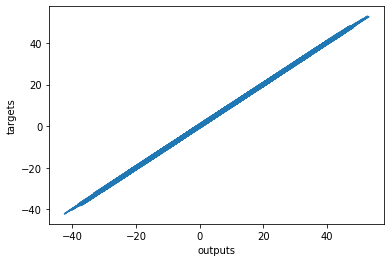

In [26]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

## Section 12 - The MNIST example

Import the relavent packages

In [27]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
print("Import done")

Import done


Data

In [28]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
# Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.


Training, Test and Validation datasets

In [29]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

num_validation_samples = 0.1*mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

# Transforming the values
def scale(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, label

# scale whole train data and store it in a variable
scaled_train_and_validation_data = mnist_train.map(scale)

# scale whole test data 
test_data = mnist_test.map(scale)

BUFFER_SIZE = 10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))
# validation_inputs, validation_targets = next(iter(validation_data))

print("done")


done


Model - Outline the model

In [30]:
input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28,1)),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dense(output_size,activation='softmax')
])

print("done")

done


Choose the optimizer and the loss function

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("done")

done


Training

In [32]:

NUM_EPOCHS = 5

model.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose =2, validation_steps=10)

Epoch 1/5
540/540 - 10s - loss: 0.4180 - accuracy: 0.8810 - val_loss: 0.2178 - val_accuracy: 0.9400
Epoch 2/5
540/540 - 10s - loss: 0.1782 - accuracy: 0.9477 - val_loss: 0.1523 - val_accuracy: 0.9573
Epoch 3/5
540/540 - 10s - loss: 0.1367 - accuracy: 0.9600 - val_loss: 0.1387 - val_accuracy: 0.9588
Epoch 4/5
540/540 - 10s - loss: 0.1121 - accuracy: 0.9670 - val_loss: 0.1082 - val_accuracy: 0.9677
Epoch 5/5
540/540 - 10s - loss: 0.0935 - accuracy: 0.9718 - val_loss: 0.1009 - val_accuracy: 0.9703


Test the Model

In [33]:
test_loss, test_accuracy = model.evaluate(test_data)

      1/Unknown - 2s 2s/step - loss: 0.1084 - accuracy: 0.9680

In [34]:
print("Test loss : ", test_loss)
print("Test accuracy : ", test_accuracy) 

Test loss :  0.1083705723285675
Test accuracy :  0.968


## Seciton 13 - Business case

Extract the data from the csv

In [35]:
import numpy as np
from sklearn import preprocessing

raw_csv_data = np.loadtxt('Audiobooks-data.csv', delimiter=',')

unscaled_inputs_all = raw_csv_data[:,1:-1]
targets_all = raw_csv_data[:,-1]

print("Import done")

OSError: ignored

In [0]:
raw_csv_data[0:3]

In [0]:
unscaled_input_all[0:3]

In [0]:
target_all[0:3]

Balance the dataset

In [0]:
num_one_targets = int(np.sum(target_all))
print("Total : ", num_one_targets)
zero_targets_counter = 0
indices_to_remove = []

for i in range(targets_all.shape[0]):
  if targets_all[i] == 0:
    zero_targets_counter += 1
    if zero_targets_counter > num_one_targets:
      indices_to_remove.append(i)

unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis=0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis=0)


Standardized the inputs

In [0]:
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)
print("Standardization is in place")

Shuffle the data

In [0]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

print("Shuffle is in place")

Split the dataset into Train, Validation and Test

In [0]:
sample_count = shuffled_inputs.shape[0]

train_samples_count = int(0.8*sample_count)
validation_samples_count = int(0.1*sample_count)
test_samples_count = sample_count - train_samples_count - validation_samples_count

print("Train sample count : ", train_samples_count)
print("Validaiotn  count : ", validation_samples_count)
print("Test count : ", test_samples_count)

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)


Save the three datasets in *.npz

In [0]:

np.savez('Audiobooks_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Audiobooks_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Audiobooks_data_test', inputs=test_inputs, targets=test_targets)

*** Create the machine leanring alogorithm

Import the relevant libraries

In [0]:
import numpy as np
import tensorflow as tf
print("import done")

Data

In [0]:
npz = np.load('Audiobooks_data_train.npz')
train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.int)

npz = np.load('Audiobooks_data_validation.npz')
validation_inputs = npz['inputs'].astype(np.float)
validation_targets = npz['targets'].astype(np.int)

npz = np.load('Audiobooks_data_test.npz')
test_inputs = npz['inputs'].astype(np.float)
test_targets = npz['targets'].astype(np.int)

print("Data - done")

Model

In [0]:

input_size = 10
output_size = 2

model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 100

max_epochs = 100

model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  

In [0]:

input_size = 10
output_size = 2

hidden_layer_size = 50
    

model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


batch_size = 100

max_epochs = 100

early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  

Test the model

In [0]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

In [0]:
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

## Section 14 : Linear Algebra

Import the relevant libraries

In [0]:
import numpy as np

Scalars

In [37]:
s = 5
print("s is : ", s)

s is :  5


Vectors

In [38]:
v = np.array([5,-2,3])
print("Vector is : ", v)

Vector is :  [ 5 -2  3]


Martices

In [39]:
m = np.array([[4,5],[9,4]])
print("Matrix : ", m)

Matrix :  [[4 5]
 [9 4]]


Data type

In [40]:
type(s)

int

In [41]:
type(v)

numpy.ndarray

Shape

In [42]:
v.shape

(3,)

In [43]:
s.shape

AttributeError: ignored

In [44]:
print("v : ", v)
v.reshape(3,1)
# v.reshape
print("v : ", v)

v :  [ 5 -2  3]
v :  [ 5 -2  3]


In [45]:
v.reshape(3,1)

array([[ 5],
       [-2],
       [ 3]])

Creating a Tesnsor

In [46]:
import numpy as np
m1 = np.array([[4,2,5],[-9,4,2]])
m1


array([[ 4,  2,  5],
       [-9,  4,  2]])

In [47]:
m2 = np.array([[4,-2,-5],[-90,4,21]])
m2

array([[  4,  -2,  -5],
       [-90,   4,  21]])

In [48]:
t = np.array([m1,m2])
t

array([[[  4,   2,   5],
        [ -9,   4,   2]],

       [[  4,  -2,  -5],
        [-90,   4,  21]]])

In [49]:
m1.shape

(2, 3)

In [50]:
t.shape

(2, 2, 3)

Manual creation of the tenor

In [51]:
t_manual = np.array([[[3,5,2],[-3,4,9]], [[9,3,4], [9,4,2]]])
t_manual

array([[[ 3,  5,  2],
        [-3,  4,  9]],

       [[ 9,  3,  4],
        [ 9,  4,  2]]])

Matrix sub and addition

In [59]:
m1 = np.array([[1,4],[5,6]])
m1


array([[1, 4],
       [5, 6]])

In [55]:
m2 = np.array([[1,1],[1,1]])
m2

array([[1, 1],
       [1, 1]])

In [0]:
m3 = m1 + m2

In [58]:
m3

array([[2, 5],
       [6, 7]])

In [0]:
m4 = m1 - m2

In [61]:
m4

array([[0, 3],
       [4, 5]])

dot - vector / scalar

In [0]:
x = np.array([1,1,1])
y = np.array([2,2,2])


In [66]:
x

array([1, 1, 1])

In [67]:
y

array([2, 2, 2])

In [68]:
np.dot(x,y) # vector

6

In [69]:
np.dot(5,6) # scalar

30